In [7]:
# Regression of examination scores of students
# Evaluation of metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from configparser import ConfigParser

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

print("Libraries imported")

Libraries imported


In [8]:
# Read the evaluation scores from output dir
# filename
filename = "output_all/prediction_score.conf"
config = ConfigParser(allow_no_value=True)
config.read(filename)
config.sections()

['polynomial', 'sgd', 'svr', 'forest', 'knn']

In [9]:
# A list to hold the values before converting them to 
# DataFrame. Using DataFrame made it easier to plot
# charts.
mean_abs_err = []
median_abs_err = []
root_mse = []

# Model names are in the sections
model_name_list = config.sections()
print(type(model_name_list))
print(model_name_list)

<class 'list'>
['polynomial', 'sgd', 'svr', 'forest', 'knn']


In [10]:
# Get the score values under each section
# Sample of the score file
# [polynomial]
# mean_abs_err = 6.760388773937033
# median_abs_err = 5.34375
# mean_sq_err = 77.09386487921815
# root_mse = 8.780311206285239

for model_name in model_name_list:
    mean_abs_err.append(float(config[model_name]['mean_abs_err']))
    median_abs_err.append(float(config[model_name]['median_abs_err']))
    root_mse.append(float(config[model_name]['root_mse']))

print(f"mean_abs_err \n{mean_abs_err}")
print(f"median_abs_err \n{median_abs_err}")
print(f"root_mse \n{root_mse}")

mean_abs_err 
[6.679894793695229, 7.576304145786787, 6.214876119363975, 6.020123336579033, 6.2412482032735195]
median_abs_err 
[5.28125, 6.248588418494222, 4.582313589462245, 4.450000000000003, 4.571428571428569]
root_mse 
[8.674631076103877, 9.558710839887567, 8.411625846686492, 8.227283968176966, 8.429147461598332]


In [11]:
# Put the scores into a dataframe

score_df = pd.DataFrame()
score_df['model_name'] = model_name_list
score_df['mean_abs_err'] = mean_abs_err
score_df['median_abs_err'] = median_abs_err
score_df['root_mse'] = root_mse
score_df

,model_name,mean_abs_err,median_abs_err,root_mse
0,polynomial,6.679895,5.281250,8.674631
1,sgd,7.576304,6.248588,9.558711
2,svr,6.214876,4.582314,8.411626
3,forest,6.020123,4.450000,8.227284
4,knn,6.241248,4.571429,8.429147


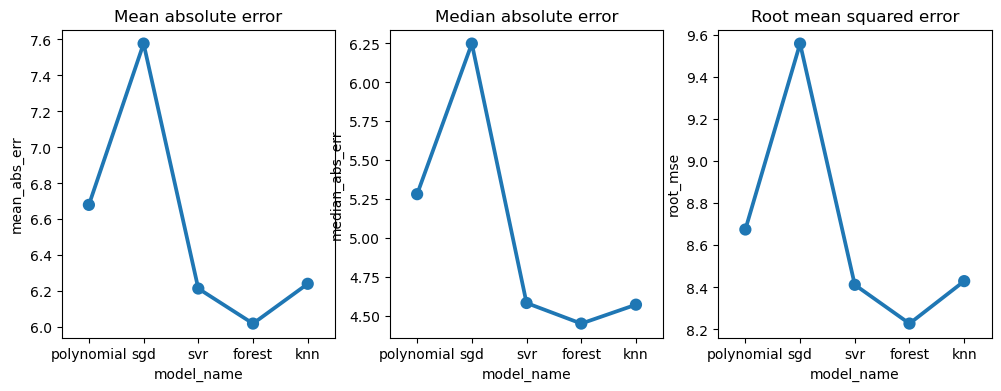

In [12]:
# Plot a bar chart to see the score of each

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.pointplot(data=score_df, x="model_name", y="mean_abs_err", ax=axes[0]);
axes[0].set_title("Mean absolute error");

sns.pointplot(data=score_df, x="model_name", y="median_abs_err", ax=axes[1]);
axes[1].set_title("Median absolute error");

sns.pointplot(data=score_df, x="model_name", y="root_mse", ax=axes[2]);
axes[2].set_title("Root mean squared error");


Observations

Linear models like polynomial linear regression and stochastic gradient descent produces the errors more than the other three algorithms.

Notice that random forest has the least errors for all three metrics. It would be chosen as the algorithms for the problem.

The table below ranks the algorithms by each of the error metrics.

With random forest as the regressor, the predicted scores will be 
- +/- 6.0 marks if mean absolute error is used. This is affected by extreme values.
- +/- 4.5 marks if median absolute error is used. This is the best choice of error margins because it is not affected by extreme values.
- +/- 8.2 marks if root mean squared error is used. This is affected by extreme values (because of the mean) and amplify errors (because of the square). 

Therefore with random forest, the predicted score will be likely to be within +/- 4.5 points of the real score.

In [17]:
# Sort by mean absolute error
score_df[['model_name', 'mean_abs_err']].sort_values(by='mean_abs_err', ascending=True, ignore_index=True)

,model_name,mean_abs_err
0,forest,6.020123
1,svr,6.214876
2,knn,6.241248
3,polynomial,6.679895
4,sgd,7.576304


In [15]:
# Sort by median absolute error
score_df[['model_name', 'median_abs_err']].sort_values(by='median_abs_err', ascending=True, ignore_index=True)

,model_name,median_abs_err
0,forest,4.450000
1,knn,4.571429
2,svr,4.582314
3,polynomial,5.281250
4,sgd,6.248588


In [16]:
# Sort by root mean squared error
score_df[['model_name', 'root_mse']].sort_values(by='root_mse', ascending=True, ignore_index=True)

,model_name,root_mse
0,forest,8.227284
1,svr,8.411626
2,knn,8.429147
3,polynomial,8.674631
4,sgd,9.558711
